In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import copy

In [5]:
data_2014 = pd.read_csv("/2014_Financial_data.csv")
data_2015 = pd.read_csv("/2015_Financial_data.csv")
data_2016 = pd.read_csv("/2016_Financial_data.csv")
data_2017 = pd.read_csv("/2017_Financial_data.csv")
data_2018 = pd.read_csv("/2018_Financial_data.csv")

In [ ]:
data_2014.head()

,Stokes,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2015 PRICE VAR [%],Class
0,PG,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.0,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,...,-0.0187,-0.0217,0.0359,0.0316,0.1228,0.0000,-0.1746,Consumer Defensive,-9.323276,0
1,VIPS,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,108330319.7,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,...,NaN,NaN,NaN,NaN,NaN,1.6484,1.7313,Consumer Defensive,-25.512193,0
2,KR,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.0,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,...,0.0618,0.0981,0.1886,0.3268,0.2738,0.0000,0.0234,Consumer Defensive,33.118297,1
3,RAD,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,0.0,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,...,0.0211,-0.0510,-0.0189,0.1963,-0.0458,0.0000,-0.0060,Consumer Defensive,2.752291,1
4,GIS,1.790960e+10,0.0076,1.153980e+10,6.369800e+09,0.0,3.474300e+09,3.412400e+09,2.957400e+09,3.024000e+08,...,0.0257,0.0090,0.0215,0.0274,0.1025,0.0000,-0.0220,Consumer Defensive,12.897715,1


In [ ]:
data_2014 = data_2014.fillna(0)
data_2015 = data_2015.fillna(0)
data_2016 = data_2016.fillna(0)
data_2017 = data_2017.fillna(0)
data_2018 = data_2018.fillna(0)

In [ ]:
data_2014.isnull().sum()

Stokes                  0
Revenue                 0
Revenue Growth          0
Cost of Revenue         0
Gross Profit            0
                       ..
R&D Expense Growth      0
SG&A Expenses Growth    0
Sector                  0
2015 PRICE VAR [%]      0
Class                   0
Length: 225, dtype: int64

In [ ]:
columns_2014 = data_2014.columns
for val in columns_2014:
  print(val)
columns_2015 = data_2015.columns
for val in columns_2015:
  print(val)
columns_2016 = data_2016.columns
for val in columns_2016:
  print(val)
columns_2017 = data_2017.columns
for val in columns_2017:
  print(val)
columns_2018 = data_2018.columns
for val in columns_2018:
  print(val)

Stokes
Revenue
Revenue Growth
Cost of Revenue
Gross Profit
R&D Expenses
SG&A Expense
Operating Expenses
Operating Income
Interest Expense
Earnings before Tax
Income Tax Expense
Net Income - Non-Controlling int
Net Income - Discontinued ops
Net Income
Preferred Dividends
Net Income Com
EPS
EPS Diluted
Weighted Average Shs Out
Weighted Average Shs Out (Dil)
Dividend per Share
Gross Margin
EBITDA Margin
EBIT Margin
Profit Margin
Free Cash Flow margin
EBITDA
EBIT
Consolidated Income
Earnings Before Tax Margin
Net Profit Margin
Cash and cash equivalents
Short-term investments
Cash and short-term investments
Receivables
Inventories
Total current assets
Property, Plant & Equipment Net
Goodwill and Intangible Assets
Long-term investments
Tax assets
Total non-current assets
Total assets
Payables
Short-term debt
Total current liabilities
Long-term debt
Total debt
Deferred revenue
Tax Liabilities
Deposit Liabilities
Total non-current liabilities
Total liabilities
Other comprehensive income
Retain

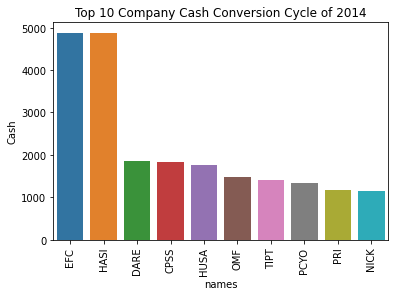

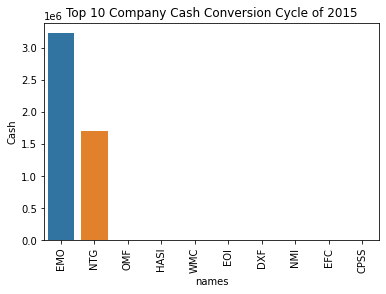

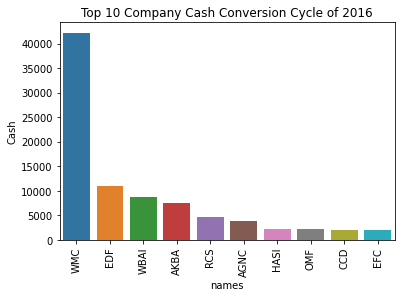

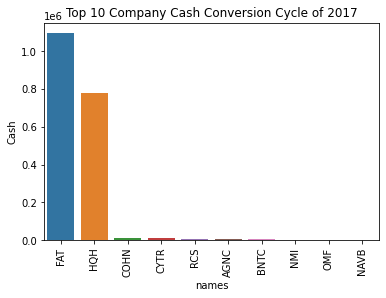

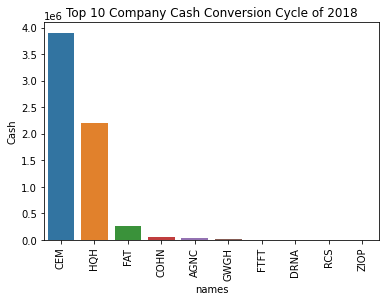

In [ ]:
# 2014 Dataset

names_2014 = data_2014["Stokes"]
revenue_2014 = data_2014["Revenue"]
Days_Sales_Outstanding_2014 = data_2014["Days Sales Outstanding"]    
Days_Payables_Outstanding_2014 = data_2014["Days Payables Outstanding"]
Days_of_Inventory_on_Hand_2014 = data_2014["Days of Inventory on Hand"]
# DSI + DSO – DPO
Cash_Conversion_cycle_2014 = []
for i in range(len(Days_Sales_Outstanding_2014)):
  Cash_Conversion_cycle_2014.append(Days_of_Inventory_on_Hand_2014[i] + Days_Sales_Outstanding_2014[i] - Days_Payables_Outstanding_2014[i])
cash_2014 = copy.deepcopy(Cash_Conversion_cycle_2014)
names_1 = copy.deepcopy(names_2014)
for i in range(len(cash_2014) - 1):
  for j in range(len(cash_2014) - 1):
    if cash_2014[j] < cash_2014[j + 1]:
      cash_2014[j], cash_2014[j + 1] = cash_2014[j + 1], cash_2014[j]
      names_1[j], names_1[j + 1] = names_1[j + 1], names_1[j]
plotting_cash_2014 = cash_2014[0:10]
plotting_name_2014 = names_1[0:10]
Required_data_2014 = {'Cash': plotting_cash_2014,
                 'names': plotting_name_2014
                 }
df_2014 = pd.DataFrame(Required_data_2014)
sns.barplot(x = "names" , y = "Cash" ,  data = df_2014)
plt.xticks(rotation = 90)
plt.title("Top 10 Company Cash Conversion Cycle of 2014")
plt.show()











# 2015 Dataset
names_2015 = data_2015["Stokes"]
revenue_2015 = data_2015["Revenue"]
Days_Sales_Outstanding_2015 = data_2015["Days Sales Outstanding"]    
Days_Payables_Outstanding_2015 = data_2015["Days Payables Outstanding"]
Days_of_Inventory_on_Hand_2015 = data_2015["Days of Inventory on Hand"]
# DSI + DSO – DPO
Cash_Conversion_cycle_2015 = []
for i in range(len(Days_Sales_Outstanding_2015)):
  Cash_Conversion_cycle_2015.append(Days_of_Inventory_on_Hand_2015[i] + Days_Sales_Outstanding_2015[i] - Days_Payables_Outstanding_2015[i])
cash_2015 = copy.deepcopy(Cash_Conversion_cycle_2015)
names_2 = copy.deepcopy(names_2015)
for i in range(len(cash_2015) - 1):
  for j in range(len(cash_2015) - 1):
    if cash_2015[j] < cash_2015[j + 1]:
      cash_2015[j], cash_2015[j + 1] = cash_2015[j + 1], cash_2015[j]
      names_2[j], names_2[j + 1] = names_2[j + 1], names_2[j]
plotting_cash_2015 = cash_2015[0:10]
plotting_name_2015 = names_2[0:10]
Required_data_2015 = {'Cash': plotting_cash_2015,
                 'names': plotting_name_2015
                 }
df_2015 = pd.DataFrame(Required_data_2015)
sns.barplot(x = "names" , y = "Cash" ,  data = df_2015)
plt.xticks(rotation = 90)
plt.title("Top 10 Company Cash Conversion Cycle of 2015")
plt.show()






# 2016 dataset
names_2016 = data_2016["Stokes"]
revenue_2016 = data_2016["Revenue"]
Days_Sales_Outstanding_2016 = data_2016["Days Sales Outstanding"]    
Days_Payables_Outstanding_2016 = data_2016["Days Payables Outstanding"]
Days_of_Inventory_on_Hand_2016 = data_2016["Days of Inventory on Hand"]
# DSI + DSO – DPO
Cash_Conversion_cycle_2016 = []
for i in range(len(Days_Sales_Outstanding_2016)):
  Cash_Conversion_cycle_2016.append(Days_of_Inventory_on_Hand_2016[i] + Days_Sales_Outstanding_2016[i] - Days_Payables_Outstanding_2016[i])
cash_2016 = copy.deepcopy(Cash_Conversion_cycle_2016)
names_3 = copy.deepcopy(names_2016)
for i in range(len(cash_2016) - 1):
  for j in range(len(cash_2016) - 1):
    if cash_2016[j] < cash_2016[j + 1]:
      cash_2016[j], cash_2016[j + 1] = cash_2016[j + 1], cash_2016[j]
      names_3[j], names_3[j + 1] = names_3[j + 1], names_3[j]
plotting_cash_2016 = cash_2016[0:10]
plotting_name_2016 = names_3[0:10]
Required_data_2016 = {'Cash': plotting_cash_2016,
                 'names': plotting_name_2016
                 }
df_2016 = pd.DataFrame(Required_data_2016)
sns.barplot(x = "names" , y = "Cash" ,  data = df_2016)
plt.xticks(rotation = 90)
plt.title("Top 10 Company Cash Conversion Cycle of 2016")
plt.show()





# 2017 dataset
names_2017 = data_2017["Stokes"]
revenue_2017 = data_2017["Revenue"]
Days_Sales_Outstanding_2017 = data_2017["Days Sales Outstanding"]    
Days_Payables_Outstanding_2017 = data_2017["Days Payables Outstanding"]
Days_of_Inventory_on_Hand_2017 = data_2017["Days of Inventory on Hand"]
# DSI + DSO – DPO
Cash_Conversion_cycle_2017 = []
for i in range(len(Days_Sales_Outstanding_2017)):
  Cash_Conversion_cycle_2017.append(Days_of_Inventory_on_Hand_2017[i] + Days_Sales_Outstanding_2017[i] - Days_Payables_Outstanding_2017[i])
cash_2017 = copy.deepcopy(Cash_Conversion_cycle_2017)
names_4 = copy.deepcopy(names_2017)
for i in range(len(cash_2017) - 1):
  for j in range(len(cash_2017) - 1):
    if cash_2017[j] < cash_2017[j + 1]:
      cash_2017[j], cash_2017[j + 1] = cash_2017[j + 1], cash_2017[j]
      names_4[j], names_4[j + 1] = names_4[j + 1], names_4[j]
plotting_cash_2017 = cash_2017[0:10]
plotting_name_2017 = names_4[0:10]
Required_data_2017 = {'Cash': plotting_cash_2017,
                 'names': plotting_name_2017
                 }
df_2017 = pd.DataFrame(Required_data_2017)
sns.barplot(x = "names" , y = "Cash" ,  data = df_2017)
plt.xticks(rotation = 90)
plt.title("Top 10 Company Cash Conversion Cycle of 2017")
plt.show()







# 2018 dataset
names_2018 = data_2018["Stokes"]
revenue_2018 = data_2018["Revenue"]
Days_Sales_Outstanding_2018 = data_2018["Days Sales Outstanding"]    
Days_Payables_Outstanding_2018 = data_2018["Days Payables Outstanding"]
Days_of_Inventory_on_Hand_2018 = data_2018["Days of Inventory on Hand"]
# DSI + DSO – DPO
Cash_Conversion_cycle_2018 = []
for i in range(len(Days_Sales_Outstanding_2018)):
  Cash_Conversion_cycle_2018.append(Days_of_Inventory_on_Hand_2018[i] + Days_Sales_Outstanding_2018[i] - Days_Payables_Outstanding_2018[i])
cash_2018 = copy.deepcopy(Cash_Conversion_cycle_2018)
names_5 = copy.deepcopy(names_2018)
for i in range(len(cash_2018) - 1):
  for j in range(len(cash_2018) - 1):
    if cash_2018[j] < cash_2018[j + 1]:
      cash_2018[j], cash_2018[j + 1] = cash_2018[j + 1], cash_2018[j]
      names_5[j], names_5[j + 1] = names_5[j + 1], names_5[j]
plotting_cash_2018 = cash_2018[0:10]
plotting_name_2018 = names_5[0:10]
Required_data_2018 = {'Cash': plotting_cash_2018,
                 'names': plotting_name_2018
                 }
df_2018 = pd.DataFrame(Required_data_2018)
sns.barplot(x = "names" , y = "Cash" ,  data = df_2018)
plt.xticks(rotation = 90)
plt.title("Top 10 Company Cash Conversion Cycle of 2018")
plt.show()





In [ ]:
print(df_2017)

           Cash names
0  1.095000e+06   FAT
1  7.789788e+05   HQH
2  1.268902e+04  COHN
3  1.255147e+04  CYTR
4  4.894411e+03   RCS
5  4.569852e+03  AGNC
6  3.822087e+03  BNTC
7  2.564656e+03   NMI
8  2.537899e+03   OMF
9  2.437895e+03  NAVB


In [ ]:
# Revenue
revenue_name = []
Total_revenue = []
names = names_2014
for i in range(len(names_2014)): 
  index_2018 = 0
  is_2014 = False
  for k in range(len(names_2014)):
    # print(names[i] , names_2014[k])
    if str(names[i]) == str(names_2014[k]):
      index_2014 = k
      is_2014 = True
      break 
  is_2015 = False
  for k in range(len(names_2015)):
    # print(names[i] , names_2014[k])
    if str(names[i]) == str(names_2015[k]):
      index_2015 = k
      is_2015 = True
      break
  is_2016 = False
  for k in range(len(names_2016)):
    # print(names[i] , names_2014[k])
    if str(names[i]) == str(names_2016[k]):
      index_2016 = k
      is_2016 = True
      break
  is_2017 = False
  for k in range(len(names_2017)):
    # print(names[i] , names_2014[k])
    if str(names[i]) == str(names_2017[k]):
      index_2017 = k
      is_2017 = True
      break
  is_2018 = False
  for k in range(len(names_2018)):
    # print(names[i] , names_2014[k])
    if str(names[i]) == str(names_2018[k]):
      index_2018 = k
      is_2018 = True
      break
  if is_2014 == True and is_2015 == True and is_2016 == True and is_2017 == True and is_2018 == True:
    revenue_name.append(names[i])
    Total_revenue.append(revenue_2014[index_2014] + revenue_2015[index_2015] + revenue_2016[index_2016] + revenue_2017[index_2017] + revenue_2018[index_2018])
for i in range(len(Total_revenue) - 1):
  for j in range(len(Total_revenue) - 1):
    if Total_revenue[j] < Total_revenue[j + 1]:
      Total_revenue[j], Total_revenue[j + 1] = Total_revenue[j + 1], Total_revenue[j]
      revenue_name[j], revenue_name[j + 1] = revenue_name[j + 1], revenue_name[j]
plotting_revenue = Total_revenue[0:10]
plotting_name = revenue_name[0:10]




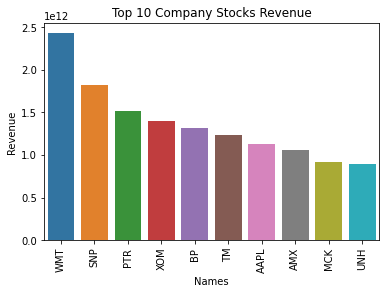

In [ ]:
Required_data = {'Names': plotting_name,
                  'Revenue': plotting_revenue
                 }
df = pd.DataFrame(Required_data)
sns.barplot(x = "Names" , y = "Revenue" ,  data = df)
plt.xticks(rotation = 90)
plt.title("Top 10 Company Stocks Revenue")
plt.show()

In [6]:
data = data_2018[["Stokes", "Free Cash Flow","Market Cap"]].merge(data_2017[["Stokes", "Free Cash Flow"]], left_on='Stokes', right_on='Stokes')

In [7]:
data.shape

(4374, 4)

In [8]:
data["Cash Flow Growth 2018"] = data["Free Cash Flow_x"] - data["Free Cash Flow_y"]

In [9]:
data["Cash Flow Growth 2018"] /= data["Free Cash Flow_y"] 


In [10]:
data.sort_values(by="Cash Flow Growth 2018", ascending=False)

,Stokes,Free Cash Flow_x,Market Cap,Free Cash Flow_y,Cash Flow Growth 2018
2666,ROYT,4.100000e+07,NaN,0.000,inf
484,LYG,-1.686168e+10,NaN,-2469135.803,6827.978425
519,PBF,2.544510e+08,3.916795e+09,66000.000,3854.318182
230,VICI,5.033690e+08,6.952910e+09,1852000.000,270.797516
2661,MCRI,-7.831800e+07,6.824793e+08,-536000.000,145.115672
...,...,...,...,...,...
4292,SSBI,NaN,NaN,NaN,NaN
4307,TCBIP,NaN,NaN,NaN,NaN
4321,TRMT,-1.649000e+06,2.877102e+07,NaN,NaN
4336,UONEK,NaN,NaN,NaN,NaN


In [11]:
intrinsic = pd.Series(index=range(0,data.shape[0]), dtype="int64")
for _, row in data.iterrows():
  sum = 0
  for i in range(10):
    sum += (row["Free Cash Flow_x"] / 1.05) * row["Cash Flow Growth 2018"]
  sum  = sum + sum * 10
  intrinsic[_] = sum

In [12]:
data["intrinsic"] = intrinsic


In [14]:
data

,Stokes,Free Cash Flow_x,Market Cap,Free Cash Flow_y,Cash Flow Growth 2018,intrinsic
0,CMCSA,1.198500e+10,1.549110e+11,9.617000e+09,0.246231,3.091601e+11
1,KMI,2.119000e+09,3.394394e+10,1.531000e+09,0.384063,8.525826e+10
2,INTC,1.425100e+10,2.141890e+11,1.033200e+10,0.379307,5.662909e+11
3,MU,8.521000e+09,6.119161e+10,3.419000e+09,1.492249,1.332095e+12
4,GE,7.090000e+08,6.331184e+10,3.858000e+09,-0.816226,-6.062616e+10
...,...,...,...,...,...,...
4369,YRIV,-6.290432e+06,6.832290e+08,-2.055351e+06,2.060515,-1.357874e+09
4370,YTEN,-8.796000e+06,8.321423e+06,-8.208000e+06,0.071637,-6.601287e+07
4371,ZKIN,-2.702133e+06,NaN,9.911300e+05,-3.726315,1.054848e+09
4372,ZOM,-1.176652e+07,1.165993e+08,-7.264753e+06,0.619673,-7.638608e+08


In [ ]:
# a = pd.DataFrame({"x": [1,4,5,6], "y":[4,7,4,3]})

In [ ]:
# b = pd.DataFrame({"x": [0,0,0,0], "y":[1,1,1,1]})

In [ ]:
# result = pd.concat([a, b])

In [ ]:
# result
# del(result["index"])

In [ ]:
# del(result["level_0"])

In [51]:
#Owners earning of 2014 
data_owner = data_2014[["Stokes", "Operating Cash Flow","Capital Expenditure"]]
df_owner_2014 = data_2014["Operating Cash Flow"] - data_2014["Capital Expenditure"]
data_owner['Owner_Collections'] = df_owner_2014
data_owner
data_owner.sort_values(by='Owner_Collections',ascending = False)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Stokes,Operating Cash Flow,Capital Expenditure,Owner_Collections
374,ASM,9.600000e+11,-1.491033e+07,9.600149e+11
2181,AMX,2.406110e+11,-1.455850e+11,3.861960e+11
3079,KST,1.942940e+11,-9.542400e+10,2.897180e+11
2384,PTR,5.755199e+10,-4.832112e+10,1.058731e+11
393,MPVD,-7.623652e+09,-9.661572e+10,8.899207e+10
...,...,...,...,...
3119,SLMBP,2.000000e+09,NaN,NaN
3121,SSBI,NaN,NaN,NaN
3123,TCBIP,NaN,NaN,NaN
3222,ENJ,NaN,NaN,NaN


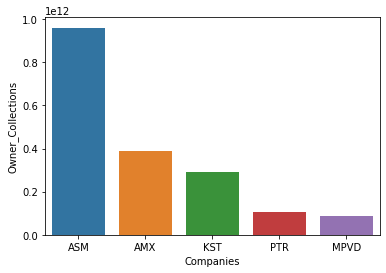

In [59]:

df = pd.DataFrame(data_owner)
df.sort_values(by="Owner_Collections",ascending = False)
df = df.nlargest(5, 'Owner_Collections')
df.rename(columns = {'Stokes':'Companies'}, inplace = True)
sns.barplot(data=df, x="Companies", y="Owner_Collections")


In [63]:
#Owners earning of 2018 
data_owner = data_2018[["Stokes", "Operating Cash Flow","Capital Expenditure"]]
df_owner_2018 = data_2018["Operating Cash Flow"] - data_2018["Capital Expenditure"]
data_owner['Owner_Collections'] = df_owner_2018
data_owner
data_owner.sort_values(by='Owner_Collections',ascending = False)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Stokes,Operating Cash Flow,Capital Expenditure,Owner_Collections
1032,SMFG,9.772210e+10,-3.575898e+09,1.012980e+11
6,AAPL,7.743400e+10,-1.331300e+10,9.074700e+10
2204,PTR,5.087771e+10,-3.843763e+10,8.931534e+10
475,GOOG,4.797100e+10,-2.663000e+10,7.460100e+10
362,GOOGL,4.797100e+10,-2.504100e+10,7.301200e+10
...,...,...,...,...
4279,SCD,2.200000e+07,NaN,NaN
4295,SLMBP,-1.670000e+08,NaN,NaN
4310,SSBI,NaN,NaN,NaN
4325,TCBIP,NaN,NaN,NaN


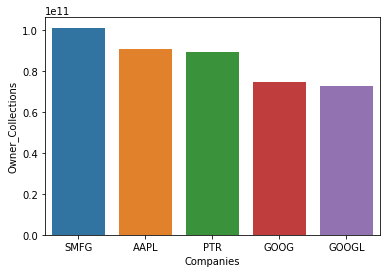

In [64]:

df = pd.DataFrame(data_owner)
df.sort_values(by="Owner_Collections",ascending = False)
df = df.nlargest(5, 'Owner_Collections')
df
df.rename(columns = {'Stokes':'Companies'}, inplace = True)
sns.barplot(data=df, x="Companies", y="Owner_Collections")


In [ ]:
#Altzman Z SCOre
#df_altzman_score = pd.Series(index=range(0,data.shape[0]), dtype="int64")
df_altzman = data_2018[["Stokes", "Working Capital","Total assets","Retained earnings (deficit)","EBIT","Book Value per Share","Total liabilities"]]
df_altzman
df_altzman_score = 6.29*(df_altzman["Working Capital"]/df_altzman["Total assets"]) + 3.26*(df_altzman["Retained earnings (deficit)"]/df_altzman["Total assets"]) + 6.72*(df_altzman["EBIT"]/df_altzman["Total assets"]) + 1.05 *(df_altzman["Book Value per Share"]/df_altzman["Total liabilities"])
df_altzman_score
df_altzman["ALTZMAN_Z_SCORE"] = df_altzman_score
#df_altzman.insert


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
#Altzman Z SCOre
#df_altzman_score = pd.Series(index=range(0,data.shape[0]), dtype="int64")
df_altzman_2018 = data_2018[["Stokes", "Working Capital","Total assets","Retained earnings (deficit)","EBIT","Book Value per Share","Total liabilities"]]
df_altzman_2018["ALTZMAN_Z_SCORE"] = 6.29*(df_altzman_2018["Working Capital"]/df_altzman_2018["Total assets"]) + 3.26*(df_altzman_2018["Retained earnings (deficit)"]/df_altzman_2018["Total assets"]) + 6.72*(df_altzman_2018["EBIT"]/df_altzman_2018["Total assets"]) + 1.05 *(df_altzman_2018["Book Value per Share"]/df_altzman_2018["Total liabilities"])
df_altzman_2018 = df_altzman_2018[["Stokes","ALTZMAN_Z_SCORE"]]
df_altzman_2018.sort_values(by =["ALTZMAN_Z_SCORE"])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Stokes,ALTZMAN_Z_SCORE
2098,TLK,-1544.781454
3854,BVSN,-1083.039618
4153,MOXC,-923.408576
3973,EVFM,-601.780536
4094,JMU,-599.396489
...,...,...
4265,RFI,NaN
4268,RGT,NaN
4279,SCD,NaN
4310,SSBI,NaN


In [ ]:
df_altzman_2018 = df_altzman_2018[["Stokes","ALTZMAN_Z_SCORE"]]
df_altzman_2018.sort_values(by ="ALTZMAN_Z_SCORE",ascending=False)


,Stokes,ALTZMAN_Z_SCORE
4137,MARPS,inf
4184,NICK,inf
3762,GRVY,2696.274158
926,EC,1509.969008
2103,PKX,1310.455485
...,...,...
4265,RFI,NaN
4268,RGT,NaN
4279,SCD,NaN
4310,SSBI,NaN


In [ ]:
#Altzman Z SCOre
#df_altzman_score = pd.Series(index=range(0,data.shape[0]), dtype="int64")
df_altzman_2014 = data_2014[["Stokes", "Working Capital","Total assets","Retained earnings (deficit)","EBIT","Book Value per Share","Total liabilities"]]

df_altzman_2014["ALTZMAN_Z_SCORE"] = 6.29*(df_altzman_2014["Working Capital"]/df_altzman_2014["Total assets"]) + 3.26*(df_altzman_2014["Retained earnings (deficit)"]/df_altzman_2014["Total assets"]) + 6.72*(df_altzman_2014["EBIT"]/df_altzman_2014["Total assets"]) + 1.05 *(df_altzman_2014["Book Value per Share"]/df_altzman_2014["Total liabilities"])
df_altzman_2014
df_altzman_2014 = df_altzman_2014[["Stokes","ALTZMAN_Z_SCORE"]]
df_altzman_2014.sort_values(by =["ALTZMAN_Z_SCORE"])
#df_altzman.insert

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Stokes,ALTZMAN_Z_SCORE
3374,EVH,-inf
984,VTGN,-1033.712712
905,OPNT,-475.024553
934,CATS,-426.880349
874,ANTH,-409.433333
...,...,...
3357,DXC,NaN
3400,TIVO,NaN
3413,WUBA,NaN
3551,MIME,NaN


In [ ]:
df_altzman_2014.sort_values(by ="ALTZMAN_Z_SCORE",ascending = False)


,Stokes,ALTZMAN_Z_SCORE
2463,MARPS,inf
3727,GRVY,4474.324710
2216,TLK,1093.524605
300,PKX,870.518995
77,CCU,663.260515
...,...,...
3357,DXC,NaN
3400,TIVO,NaN
3413,WUBA,NaN
3551,MIME,NaN


In [ ]:
#BENISH M SCORE
data_2018["Assets_Quality_Index"] = data_2018["Total non-current assets"]/data_2018["Total assets"]
data_2018["Sales"] = data_2018["Enterprise Value"]/data_2018["EV to Sales"]
data_2017["Sales"] = data_2017["Enterprise Value"]/data_2017["EV to Sales"]


data = data_2018[["Stokes", "daysOfSalesOutstanding","Gross Margin","Assets_Quality_Index","Sales","Depreciation & Amortization"]].merge(data_2017[["Stokes", "daysOfSalesOutstanding","Gross Margin","Sales","Depreciation & Amortization"]], left_on='Stokes', right_on='Stokes')
data["DSRI"] = data["daysOfSalesOutstanding_x"]/data["daysOfSalesOutstanding_y"]
data["GMI"] = data["Gross Margin_x"]/data["Gross Margin_y"]
data["SGI"] = data["Sales_x"]/data["Sales_y"]
data["DEPI"] = data["Depreciation & Amortization_x"]/data["Depreciation & Amortization_y"]
data

,Stokes,daysOfSalesOutstanding_x,Gross Margin_x,Assets_Quality_Index,Sales_x,Depreciation & Amortization_x,daysOfSalesOutstanding_y,Gross Margin_y,Sales_y,Depreciation & Amortization_y,DSRI,GMI,SGI,DEPI
0,CMCSA,0.0000,1.0000,0.913193,9.450597e+10,1.067600e+10,0.0000,1.0000,8.502889e+10,9.688000e+09,NaN,1.000000,1.111457,1.101982
1,KMI,-19.2817,0.4847,0.927447,1.414412e+10,2.297000e+09,-21.4498,0.4735,1.370492e+10,2.261000e+09,0.898922,1.023654,1.032047,1.015922
2,INTC,-97.6484,0.6173,0.775037,7.084871e+10,9.085000e+09,-107.7123,0.6230,6.276036e+10,8.129000e+09,0.906567,0.990851,1.128877,1.117604
3,MU,-104.9740,0.5887,0.630233,3.039109e+10,4.759000e+09,-95.9023,0.4151,2.032230e+10,3.861000e+09,1.094593,1.418212,1.495455,1.232582
4,GE,-52.7765,0.2151,0.000000,1.216193e+11,8.224000e+09,-68.7808,0.1285,1.151627e+11,7.429000e+09,0.767314,1.673930,1.056065,1.107013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4369,YRIV,0.0000,0.0000,0.000000,inf,8.241000e+03,0.0000,0.0000,inf,3.135700e+04,NaN,NaN,NaN,0.262812
4370,YTEN,0.0000,1.0000,0.507948,5.559987e+05,1.960000e+05,0.0000,1.0000,9.440012e+05,2.060000e+05,NaN,1.000000,0.588981,0.951456
4371,ZKIN,-177.4658,0.3333,0.157744,NaN,4.077410e+05,-115.1804,0.2916,NaN,4.384010e+05,1.540764,1.143004,NaN,0.930064
4372,ZOM,0.0000,0.0000,0.360082,inf,2.057670e+05,0.0000,0.0000,inf,9.241000e+04,NaN,NaN,NaN,2.226675


In [ ]:
d_b = data[["Stokes","Assets_Quality_Index","DSRI","GMI","SGI","DEPI"]]
d_b["Benish-M Score"] = -6.065 + 0.906*(d_b["GMI"])+ 0.593* (d_b["Assets_Quality_Index"])+ 0.717*(d_b["SGI"])+0.107 *(d_b["DEPI"])
d_b

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Stokes,Assets_Quality_Index,DSRI,GMI,SGI,DEPI,Benish-M Score
0,CMCSA,0.913193,NaN,1.000000,1.111457,1.101982,-3.702650
1,KMI,0.927447,0.898922,1.023654,1.032047,1.015922,-3.738913
2,INTC,0.775037,0.906567,0.990851,1.128877,1.117604,-3.778704
3,MU,0.630233,1.094593,1.418212,1.495455,1.232582,-3.202243
4,GE,0.000000,0.767314,1.673930,1.056065,1.107013,-3.672770
...,...,...,...,...,...,...,...
4369,YRIV,0.000000,NaN,NaN,NaN,0.262812,NaN
4370,YTEN,0.507948,NaN,1.000000,0.588981,0.951456,-4.333682
4371,ZKIN,0.157744,1.540764,1.143004,NaN,0.930064,NaN
4372,ZOM,0.360082,NaN,NaN,NaN,2.226675,NaN


In [ ]:
Benish_M_Score = d_b[["Stokes","Benish-M Score"]]
Benish_M_Score
Benish_M_Score = Benish_M_Score.fillna(0)
Benish_M_Score


,Stokes,Benish-M Score
0,CMCSA,-3.702650
1,KMI,-3.738913
2,INTC,-3.778704
3,MU,-3.202243
4,GE,-3.672770
...,...,...
4369,YRIV,0.000000
4370,YTEN,-4.333682
4371,ZKIN,0.000000
4372,ZOM,0.000000


In [ ]:
Benish_M_Score.sort_values(by="Benish-M Score",ascending=False)

,Stokes,Benish-M Score
3857,CCUR,inf
3690,XENE,inf
2434,LJPC,inf
2160,ZGNX,inf
3055,MITT,inf
...,...,...
2722,MVIS,-19.590124
3614,GURE,-25.562622
3984,FRD,-34.505579
3034,MOTS,-inf


In [ ]:
Benish_M_Score.sort_values(by=["Benish-M Score"])

,Stokes,Benish-M Score
3034,MOTS,-inf
3294,CATB,-inf
3984,FRD,-34.505579
3614,GURE,-25.562622
2722,MVIS,-19.590124
...,...,...
3690,XENE,inf
1631,MRTX,inf
2401,SAGE,inf
1933,CHRS,inf


In [46]:
#Revenue 

result = pd.concat([data_2014,data_2015,data_2016,data_2017,data_2018])
result = result[["Stokes","Revenue"]]
Revenue =result.groupby('Stokes').sum()
Revenue
Revenue.sort_values(by='Revenue',ascending = False)



,Revenue
Stokes,
KST,7.230260e+12
WMT,2.430291e+12
SNP,1.820933e+12
PTR,1.512515e+12
XOM,1.403876e+12
...,...
EDD,-1.424920e+08
GMZ,-1.644910e+08
NML,-1.989800e+08


In [21]:
#Revenue 

result = pd.concat([data_2014,data_2015,data_2016,data_2017,data_2018])
result = result[["Stokes","Revenue"]]
Revenue =result.groupby('Stokes')['Revenue'].sum().reset_index()

Revenue
df = Revenue.sort_values(by='Revenue',ascending = False)
df.rename(columns = {'Stokes':"Companies" }, inplace = True)

#sns.barplot(x=df['Companies'].head(5),y=df['Revenue'],data=df)
df = df.sort_values(by='Received orders',ascending = False)
sns.barplot(x=df['State names'].head(10),y=df['Received orders'],data=df)



AttributeError: ignored

In [19]:
Revenue.sort_values(by='Revenue',ascending = False)
dfr= Revenue['Revenue'].nlargest(n=5)
#df = df['Received orders'].nlargest(n=10)
dfr

KeyError: ignored

In [ ]:
Required_data = {'Names': plotting_name,
                  'Revenue': plotting_revenue
                 }
df = pd.DataFrame(Required_data)
sns.barplot(x = "Names" , y = "Revenue" ,  data = df)
plt.xticks(rotation = 90)
plt.title("Top 10 Company Stocks Revenue")
plt.show()

In [49]:
df = pd.DataFrame(Revenue)
df["Stokes"]

KeyError: ignored

In [20]:
result = pd.concat([data_2014,data_2015,data_2016,data_2017,data_2018])
result = result[["Sector","Gross Profit"]]
gross_profit =result.groupby(['Sector']).sum()
gross_profit
high_gross_profit= gross_profit.sort_values(by = "Gross Profit",ascending = False)
high_gross_profit

,Gross Profit
Sector,
Financial Services,9.593074e+12
Technology,4.804125e+12
Communication Services,4.634474e+12
Consumer Cyclical,4.541804e+12
Healthcare,3.983627e+12
Industrials,3.757640e+12
Energy,3.611744e+12
Consumer Defensive,3.476319e+12
Basic Materials,1.271071e+12


In [6]:
#Cash Conversion cycle 
resultx = pd.concat([data_2014,data_2015,data_2016,data_2017,data_2018])
resultx = resultx[["Stokes","Days Sales Outstanding","Days Payables Outstanding","Days of Inventory on Hand"]]
CCC = resultx.groupby(['Stokes']).sum()
CCC.reset_index()
CCC["Cash Conversion Cycle"] = CCC["Days of Inventory on Hand"]+ CCC["Days Sales Outstanding"] - CCC["Days Payables Outstanding"]
CCC
CCC.nsmallest(5, "Cash Conversion Cycle")
CCC = CCC.sort_values(by=["Cash Conversion Cycle"])
#CCC.rename(columns={CCC.columns[-1]: "Stocks" }, inplace = True)
CCC




,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Cash Conversion Cycle
Stokes,,,,
CRK,2.621882e+02,5.642507e+02,-5.182867e+06,-5.183169e+06
CYAD,6.919081e+04,1.055002e+06,0.000000e+00,-9.858109e+05
MFGP,2.037712e+02,1.122280e+01,-9.360909e+05,-9.358984e+05
RDHL,5.387853e+02,4.284258e+05,-2.110469e+02,-4.280981e+05
RARE,8.130355e+02,1.604948e+04,-2.785552e+05,-2.937916e+05
...,...,...,...,...
FAT,1.848337e+06,4.974177e+05,0.000000e+00,1.350919e+06
NTG,1.706893e+06,0.000000e+00,0.000000e+00,1.706893e+06
EMO,2.756979e+06,0.000000e+00,0.000000e+00,2.756979e+06
